In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

In [2]:
#Read data
df=pd.read_csv('data.csv')
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [3]:
df.transpose()

0         1         2         3         4    \
id                         842302    842517  84300903  84348301  84358402   
diagnosis                       M         M         M         M         M   
radius_mean                 17.99     20.57     19.69     11.42     20.29   
texture_mean                10.38     17.77     21.25     20.38     14.34   
perimeter_mean              122.8     132.9     130.0     77.58     135.1   
area_mean                  1001.0    1326.0    1203.0     386.1    1297.0   
smoothness_mean            0.1184   0.08474    0.1096    0.1425    0.1003   
compactness_mean           0.2776   0.07864    0.1599    0.2839    0.1328   
concavity_mean             0.3001    0.0869    0.1974    0.2414     0.198   
concave points_mean        0.1471   0.07017    0.1279    0.1052    0.1043   
symmetry_mean              0.2419    0.1812    0.2069    0.2597    0.1809   
fractal_dimension_mean    0.07871   0.05667   0.05999   0.09744   0.05883   
radius_se                   1.095    0.5435    0.7456    0.4956    0.7572   
texture_se                 0.9053    0.7339    0.7869     1.156    0.7813   
perimeter_se                8.589     3.398     4.585     3.445     5.438   
area_se                     153.4     74.08     94.03     27.23     94.44   
smoothness_se            0.006399  0.005225   0.00615   0.00911   0.01149   
compactness_se            0.04904   0.01308   0.04006   0.07458   0.02461   
concavity_se              0.05373    0.0186   0.03832   0.05661   0.05688   
concave points_se         0.01587    0.0134   0.02058   0.01867   0.01885   
symmetry_se               0.03003   0.01389    0.0225   0.05963   0.01756   
fractal_dimension_se     0.006193  0.003532  0.004571  0.009208  0.005115   
radius_worst                25.38     24.99     23.57     14.91     22.54   
texture_worst               17.33     23.41     25.53      26.5     16.67   
perimeter_worst             184.6     158.8     152.5     98.87     152.2   
area_worst                 2019.0    1956.0    1709.0     567.7    1575.0   
smoothness_worst           0.1622    0.1238    0.1444    0.2098    0.1374   
compactness_worst          0.6656    0.1866    0.4245    0.8663     0.205   
concavity_worst            0.7119    0.2416    0.4504    0.6869       0.4   
concave points_worst       0.2654     0.186     0.243    0.2575    0.1625   
symmetry_worst             0.4601     0.275    0.3613    0.6638    0.2364   
fractal_dimension_worst    0.1189   0.08902   0.08758     0.173   0.07678   
Unnamed: 32                   NaN       NaN       NaN       NaN       NaN   

                              5         6         7         8         9    \
id                         843786    844359  84458202    844981  84501001   
diagnosis                       M         M         M         M         M   
radius_mean                 12.45     18.25     13.71      13.0     12.46   
texture_mean                 15.7     19.98     20.83     21.82     24.04   
perimeter_mean              82.57     119.6      90.2      87.5     83.97   
area_mean                   477.1    1040.0     577.9     519.8     475.9   
smoothness_mean            0.1278   0.09463    0.1189    0.1273    0.1186   
compactness_mean             0.17     0.109    0.1645    0.1932    0.2396   
concavity_mean             0.1578    0.1127   0.09366    0.1859    0.2273   
concave points_mean       0.08089     0.074   0.05985   0.09353   0.08543   
symmetry_mean              0.2087    0.1794    0.2196     0.235     0.203   
fractal_dimension_mean    0.07613   0.05742   0.07451   0.07389   0.08243   
radius_se                  0.3345    0.4467    0.5835    0.3063    0.2976   
texture_se                 0.8902    0.7732     1.377     1.002     1.599   
perimeter_se                2.217      3.18     3.856     2.406     2.039   
area_se                     27.19     53.91     50.96     24.32     23.94   
smoothness_se             0.00751  0.004314  0.008805  0.005731  0.007149   
compactness_se           

In [4]:
df = df.drop(["id", "Unnamed: 32"], axis = 1)
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

In [5]:
#Analysing and Visualising data

#Explore information about dataframe: index dtype, columns, non-null values, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
#Explore descriptive statistics about dataframe
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [7]:
df.describe().transpose()

count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.400000   251.20000  
area_worst               515.300000  686.500000  1084.

In [8]:
# matrix of correlation
df.corr()

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

<AxesSubplot:>

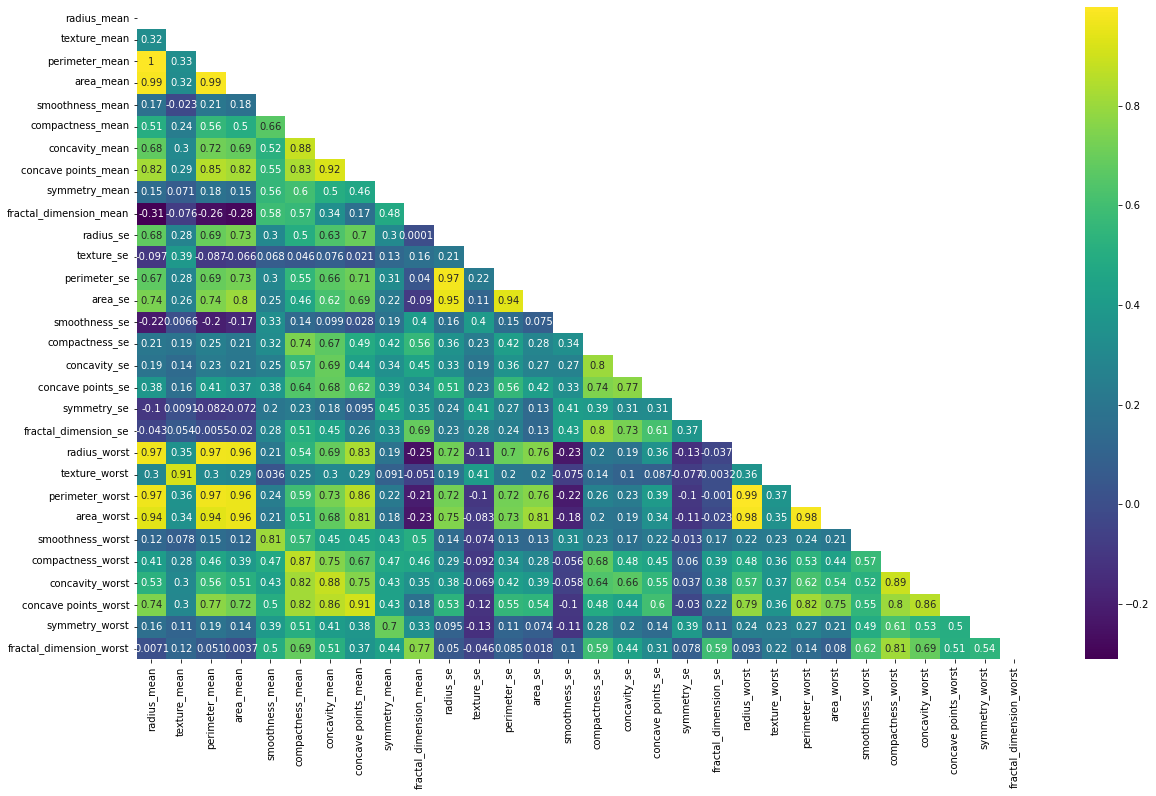

In [9]:
#Create a heatmap that displays the correlation between all the columns
# figure size
plt.figure(figsize=(20,12))
# correlation matrix
corr = df.corr()
# upper triangle is marked
marked_matrix = np.triu(corr)
# plot heatmap
sns.heatmap(data = corr, cmap='viridis', annot=True, mask = marked_matrix)  # 

In [10]:
#Preprocessing data

#Feature sellection
# correlation matrix
corr = df.corr()
corr_abs = corr.abs()
# select upper triangle of correlation matrix
upper_triangle = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))

# columns with high correlation to be dropped
# dropped_columns = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.75)]  # this give accuracy 95%
# dropped_columns = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.8)]     # this give accuracy 95%
dropped_columns = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.85)]  # accuracy 97%
# dropped_columns = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.9)]     # 97%

# drop columns from dataframe
df = df.drop(dropped_columns, axis = 1)
df

C:\Users\sures\AppData\Local\Temp/ipykernel_18252/3261940442.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))


diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0           M        17.99         10.38          0.11840           0.27760   
1           M        20.57         17.77          0.08474           0.07864   
2           M        19.69         21.25          0.10960           0.15990   
3           M        11.42         20.38          0.14250           0.28390   
4           M        20.29         14.34          0.10030           0.13280   
..        ...          ...           ...              ...               ...   
564         M        21.56         22.39          0.11100           0.11590   
565         M        20.13         28.25          0.09780           0.10340   
566         M        16.60         28.08          0.08455           0.10230   
567         M        20.60         29.33          0.11780           0.27700   
568         B         7.76         24.54          0.05263           0.04362   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     smoothness_se  compactness_se  concavity_se  concave points_se  \
0         0.006399         0.04904       0.05373            0.01587   
1         0.005225         0.01308       0.01860            0.01340   
2         0.006150         0.04006       0.03832            0.02058   
3         0.009110         0.07458       0.05661            0.01867   
4         0.011490         0.02461       0.05688            0.01885   
..             ...             ...           ...                ...   
564       0.010300         0.02891       0.05198            0.02454   
565       0.005769         0.02423       0.03950            0.01678   
566       0.005903         0.03731       0.04730            0.01557   
567       0.006522         0.06158       0.07117            0.01664   
568       0.007189         0.00466       0.00000            0.00000   

     symmetry_se  fractal_dimension_se  smoothness_worst  symmetry_worst  \
0        0.03003              0.006193           0.16220          0.4601   
1        0.01389              0.003532           0.12380          0.2750   
2        0.02250              0.004571           0.14440          0.3613   
3        0.05963              0.009208           0.20980          0.6638   
4        0.01756              0.005115           0.13740          0.2364   
..           ...                   ...               ...             ...   
564      0.01114              0.004239           0.14100          0.2060   
565      0.01898              0.002498           0.11660          0.2572   
566      0.01318              0.003892           0.11390          0.2218   
567      0.02324              0.006185           0.16500          0.4087   
568      0.02676              0.002783           0.08996          0.2871   

     fractal_dimension_worst  
0                    0.11890  
1                    0.08902  
2                    0.08758  
3                    0.17300  
4                    0.07678  
..                       ...  
564                  0.07115  
565                  0.06637  
566                  0.07820  
567                  0.12400  
568                  0.07039  

[569 rows x 18 columns]

In [11]:
#Explore features that were dropped
dropped_columns

['perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

In [12]:
len(dropped_columns)

13

<Figure size 1080x1080 with 0 Axes>

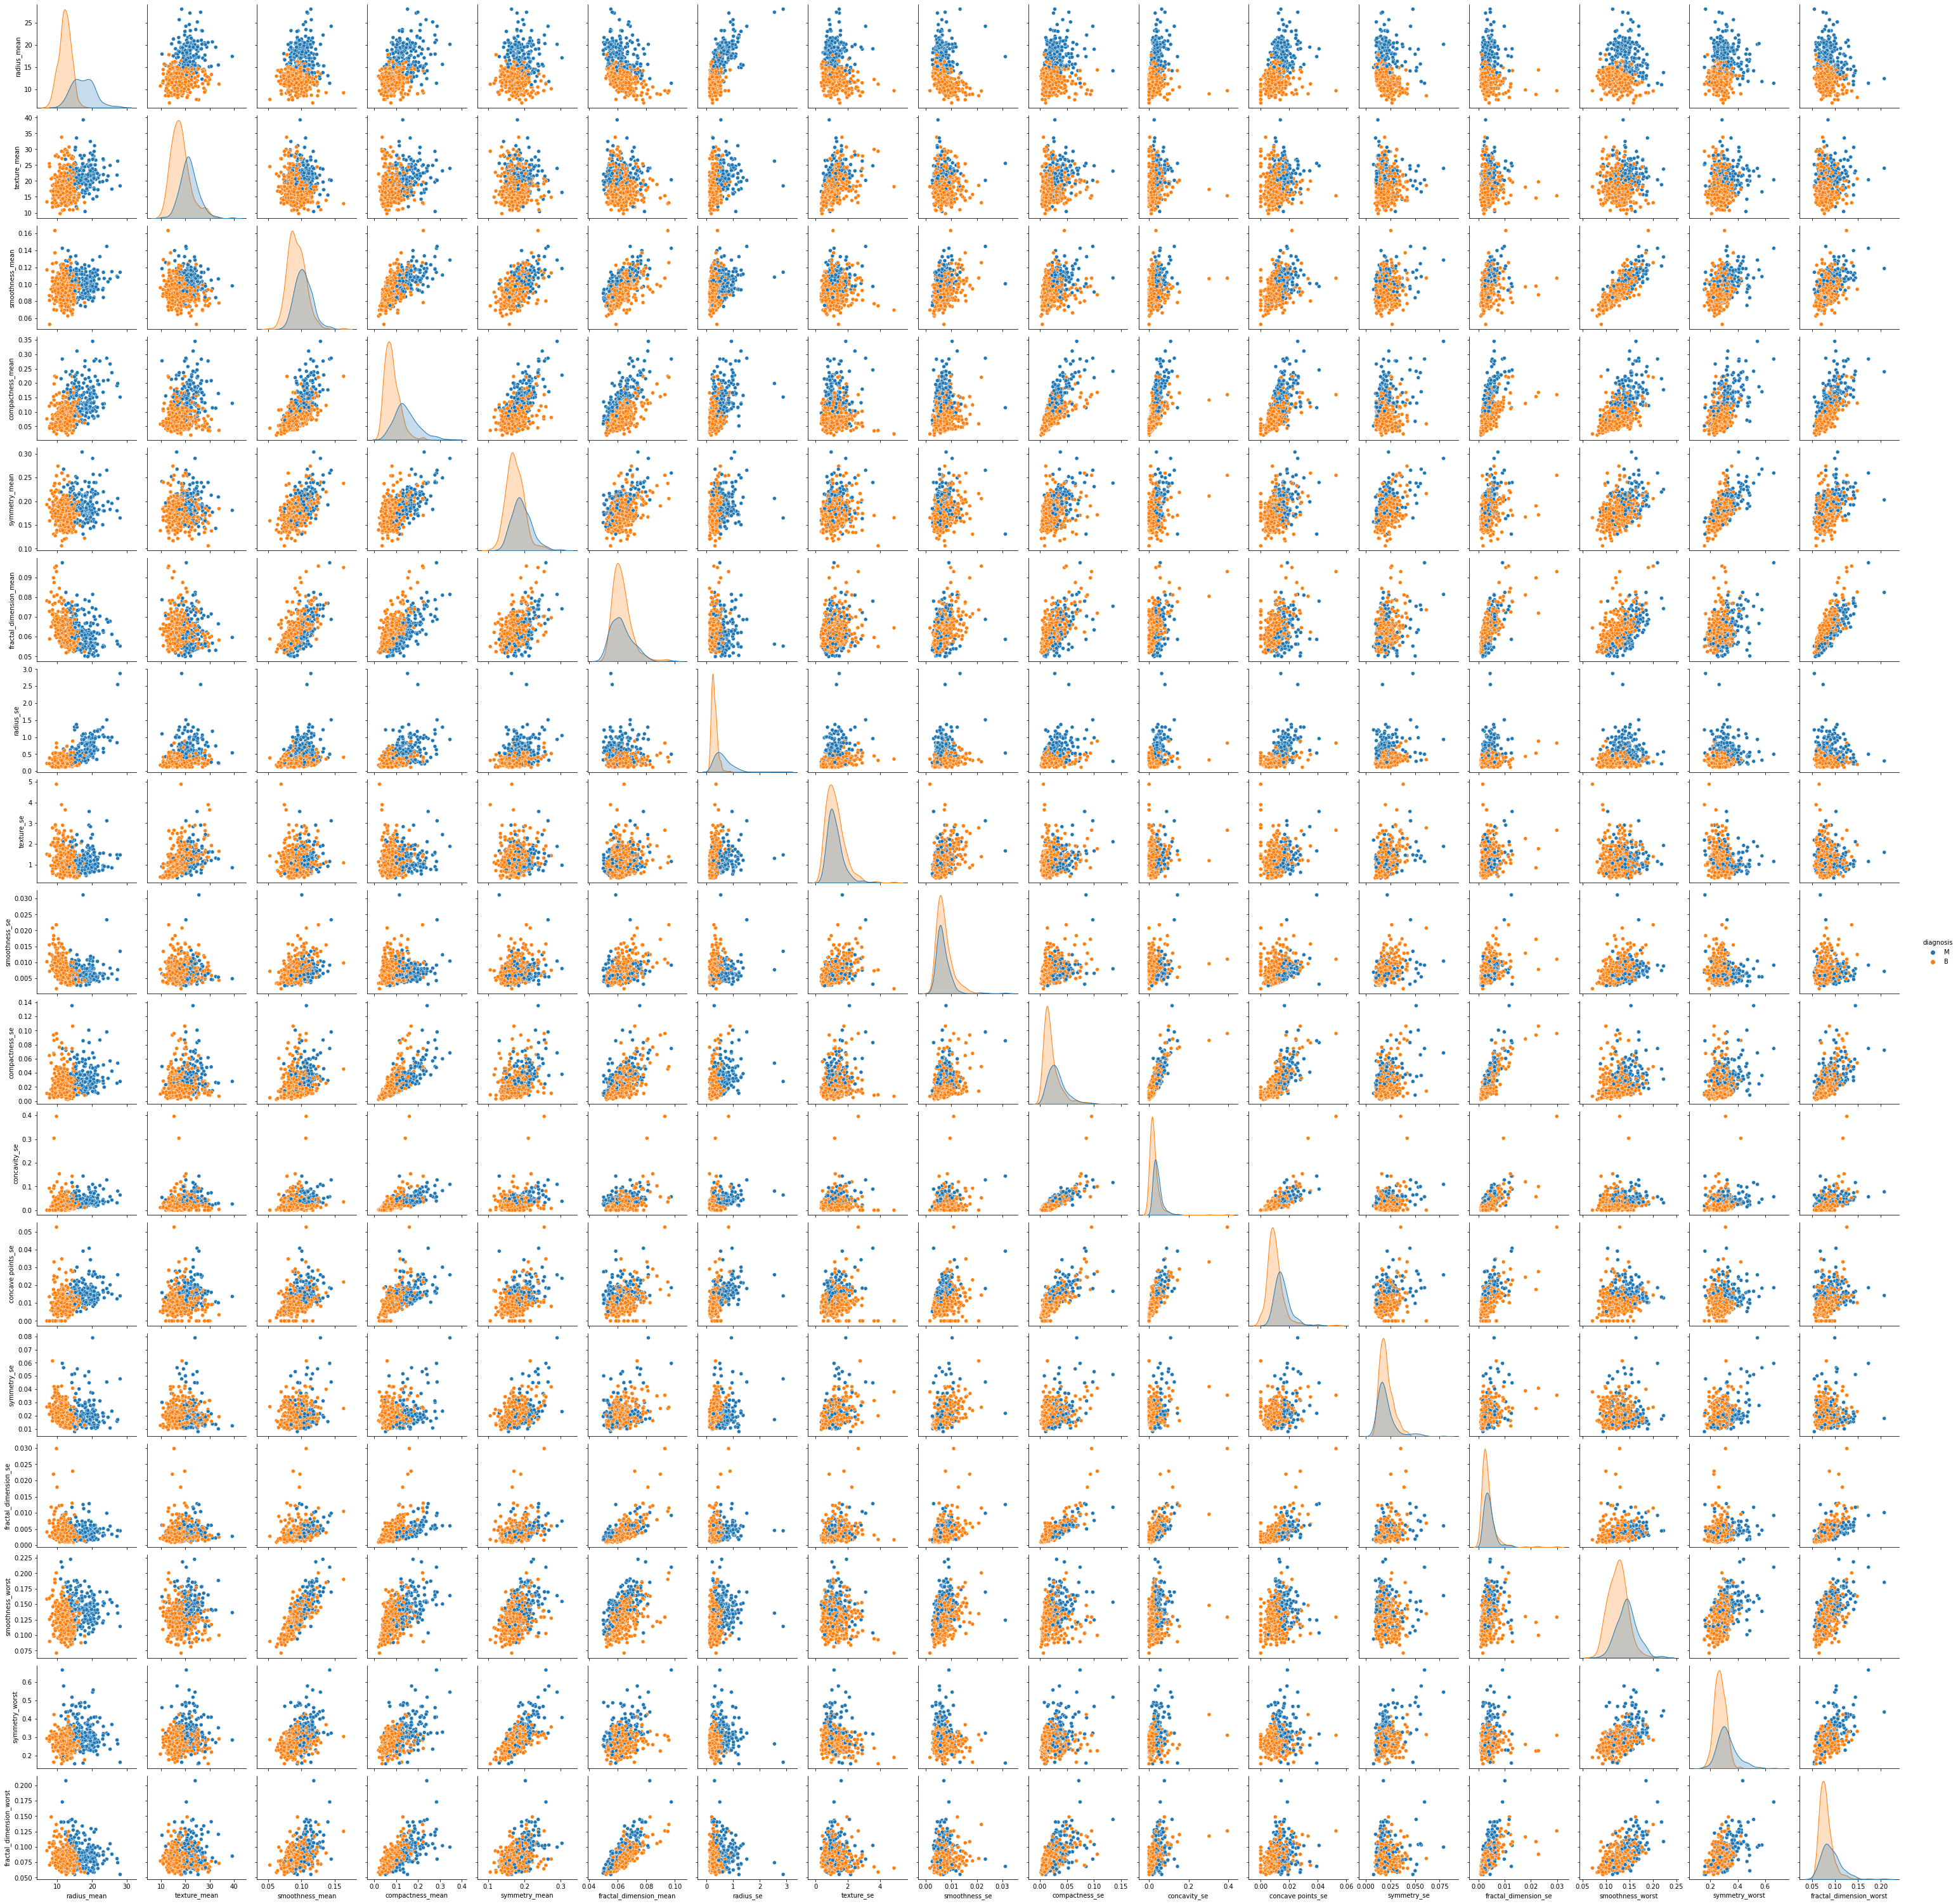

In [13]:
#Display the relationships between selected features in a pair plot.

# figure size
plt.figure(figsize=(15,15))
# pairplot
sns.pairplot(df, hue='diagnosis')

In [14]:
#Features X and target y
#We first drop the column "diagnosis" to obtain X = features. The column y = "diagnosis" is target.
# Features
X = df.drop("diagnosis", axis = 1)

# Target
y = df["diagnosis"]

In [15]:
y.unique()

array(['M', 'B'], dtype=object)

In [16]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

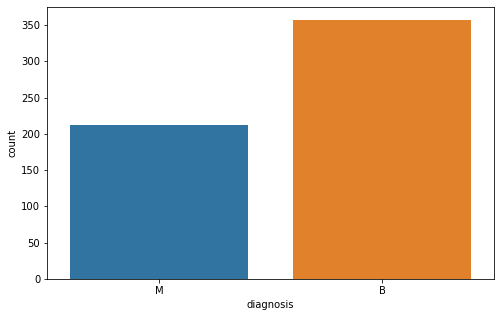

In [17]:
#Plot total count of target values
plt.figure(figsize=(8, 5))
sns.countplot(y)

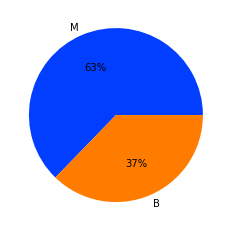

In [18]:
# declaring data
data = y.value_counts()
keys = y.unique()
  
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [19]:
#Spliting and Scaling data
# We use 30% of data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [20]:
# Create an object of StandardScaler
scaler = StandardScaler()

# We only fit to the training data, not test data.
scaled_X_train = scaler.fit_transform(X_train)

# We transform but not fit the test data.
scaled_X_test = scaler.transform(X_test)

In [21]:
#Create an instance of LogisticRegression model¶
svm_model = svm.SVC()

In [22]:
svm_model.fit(scaled_X_train,y_train)

SVC()

In [23]:
#Predict on test data
y_pred = svm_model.predict(scaled_X_test)
y_pred

array(['B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B'], dtype=object)

In [24]:
#Evaluation
#Measuring Model Performance
score = accuracy_score(y_test,y_pred, normalize=True)
score

0.9532163742690059

In [25]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[103,   2],
       [  6,  60]], dtype=int64)

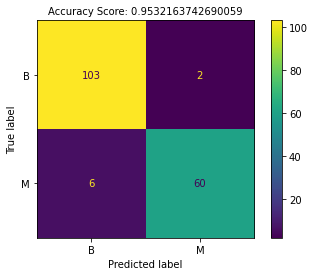

In [27]:
#Visualization of confusion_matrix
plot_confusion_matrix(svm_model,scaled_X_test,y_test)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);

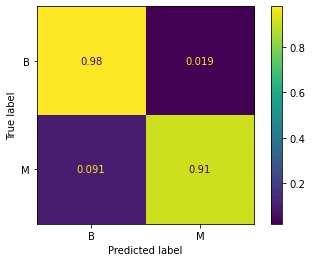

In [29]:
#Scaling plot to frequency. This gives us better insight.
plot_confusion_matrix(svm_model,scaled_X_test,y_test,normalize='true')

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.94      0.98      0.96       105
           M       0.97      0.91      0.94        66

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



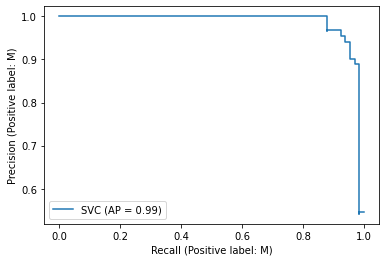

In [32]:
#Plot the Precision-Recall curve¶
#The precision-recall curve below shows both high recall and high precision.
plot_precision_recall_curve(svm_model,scaled_X_test,y_test)

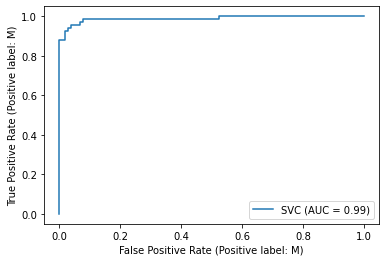

In [33]:
#The ROC curve below shows the area under the curve approaches almost 1.
plot_roc_curve(svm_model,scaled_X_test,y_test)